In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_cropdata.csv to cleaned_cropdata.csv


In [6]:
df = pd.read_csv('cleaned_cropdata.csv')

# Define features & label
X = df[['Rainfall', 'Temperature', 'Ph', 'Crop_encoded']]
y = df['Production']
#print features
X.head()

,Rainfall,Temperature,Ph,Crop_encoded
0,423.38549,27.0,4.3,0
1,423.40081,27.0,4.3,0
2,423.42756,27.0,4.3,0
3,423.43750,27.0,4.3,0
4,423.45455,27.0,4.3,0


Analyzing how each feature correlated with production

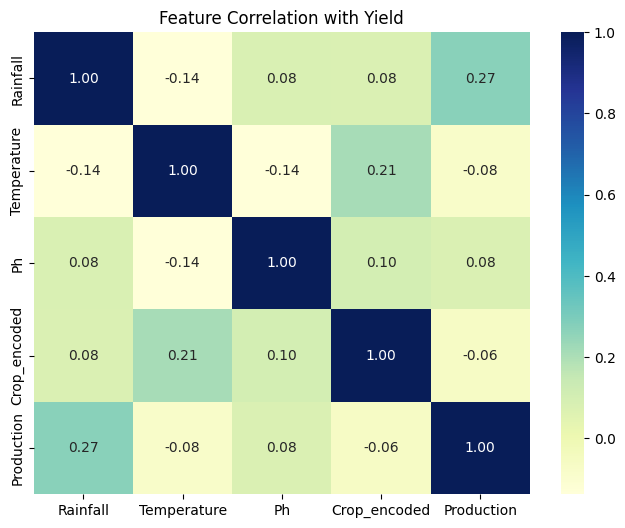

In [7]:
# Add the label to a copy of X for correlation
X_corr = X.copy()
X_corr['Production'] = y

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(X_corr.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Feature Correlation with Yield")
plt.show()


Feature Importance

Rainfall       : 0.3030
Temperature    : 0.1727
Ph             : 0.2016
Crop_encoded   : 0.3228


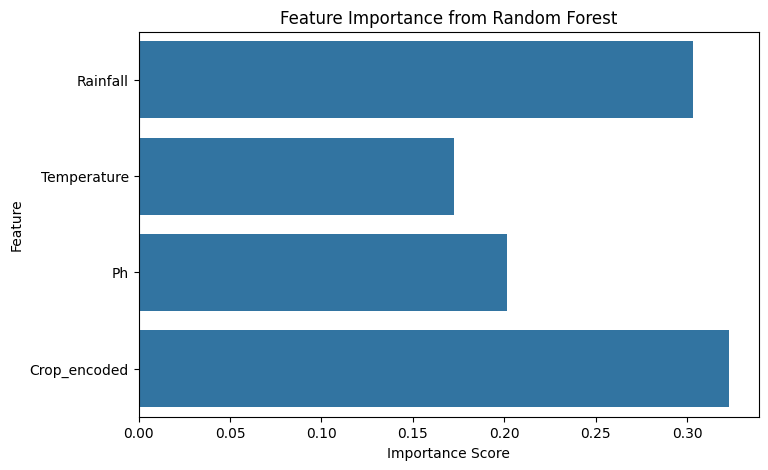

In [8]:
# Train a new Random Forest to get feature importances
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
features = X.columns

# Create table
for feat, score in zip(features, importances):
    print(f"{feat:<15}: {score:.4f}")

# 📊 Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
